# Classification ,  Decision Tree's and K Nearest Neighbhours

Classification in machine learning is a supervised learning technique used to categorize data into predefined classes or categories. It involves training a model on labeled data to learn the relationships between input features and their corresponding classes, enabling the model to predict the class of new, unseen data. 

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features

Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.

Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

The disadvantages of decision trees include:

Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.


Algorithms used to build Decision Tree's use metrics such as Gini Impurity and Shannon's Entropy to decide which variable to split on and how to split on the variable . Such algorithms work to maximise the information gain calculated by the metrics and often terminate when the metric is close to or equal to 0
Shannons Entropy is given by 
$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$
where $p_i$ is the probability of finding the system in the $i$-th state. 


Information Gain is given by:

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where 
$q$ is the number of groups after the split, 
$N_i$ is number of objects from the sample in which variable 
$Q$ is equal to the 
$i$-th value. 

We shall see how to build Decision Tree's and see how they are applied onto real datasets

In [185]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()   
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import sklearn

We shall first fit a decision tree to some syntheic data to see how it works. We shall generate 2 classes of data both from a normal distribution with different means.

In [186]:
np.random.seed(42) 
#First Class
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

#Second Class
train_data = np.r_[train_data , np.random.normal(loc=2 , size =(100,2))]
train_labels = np.r_[train_labels ,np.ones(100)]


We shall now plot our data

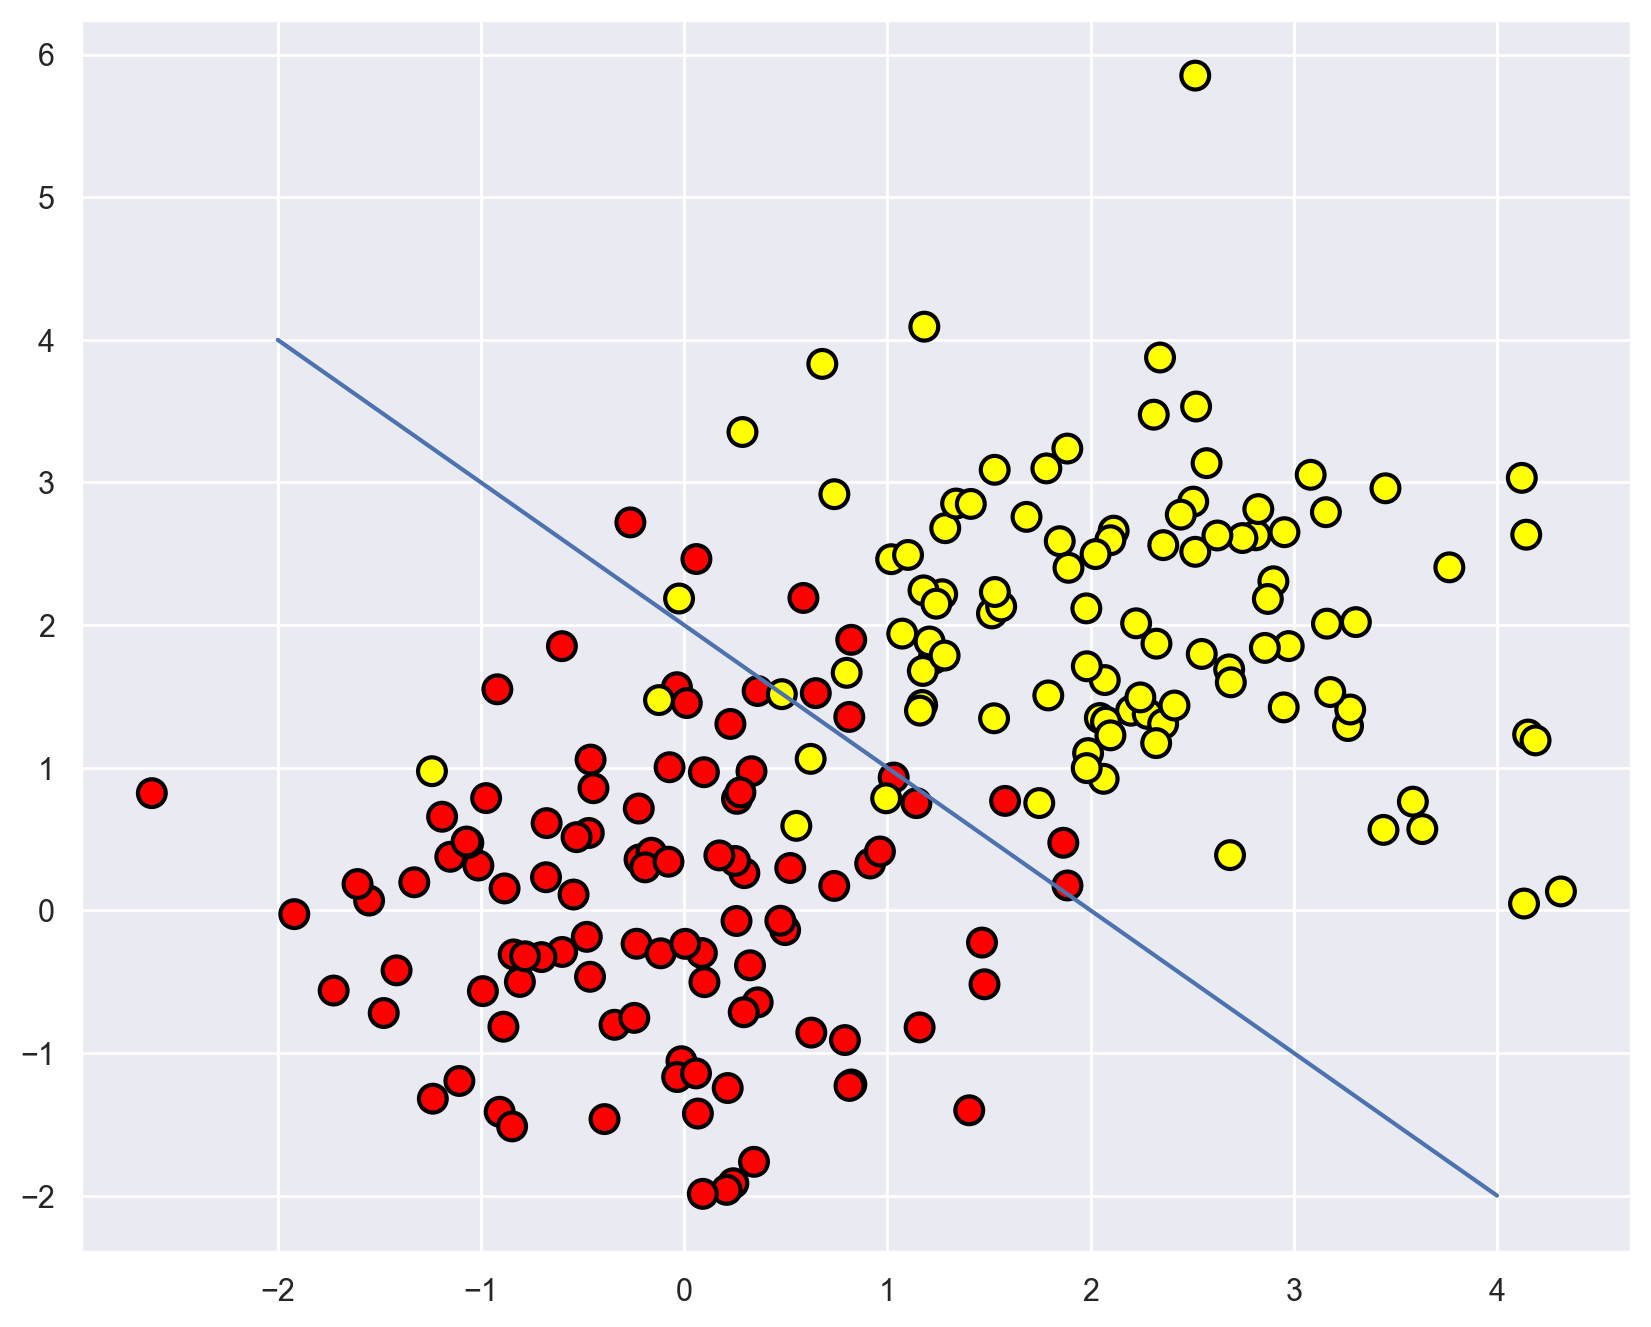

In [187]:
plt.figure(figsize = (10,8))
plt.scatter(
    train_data[:,0],
    train_data[:,1],
    s=100,
    c = train_labels,
    cmap = "autumn",
    edgecolors= "black",
    linewidth = 1.5,


)
plt.plot(range(-2, 5), range(4, -3, -1));

As you can see visually we can seperate both classes in the graph with a linear line . We shall try to seperate them using a Decision Tree now.

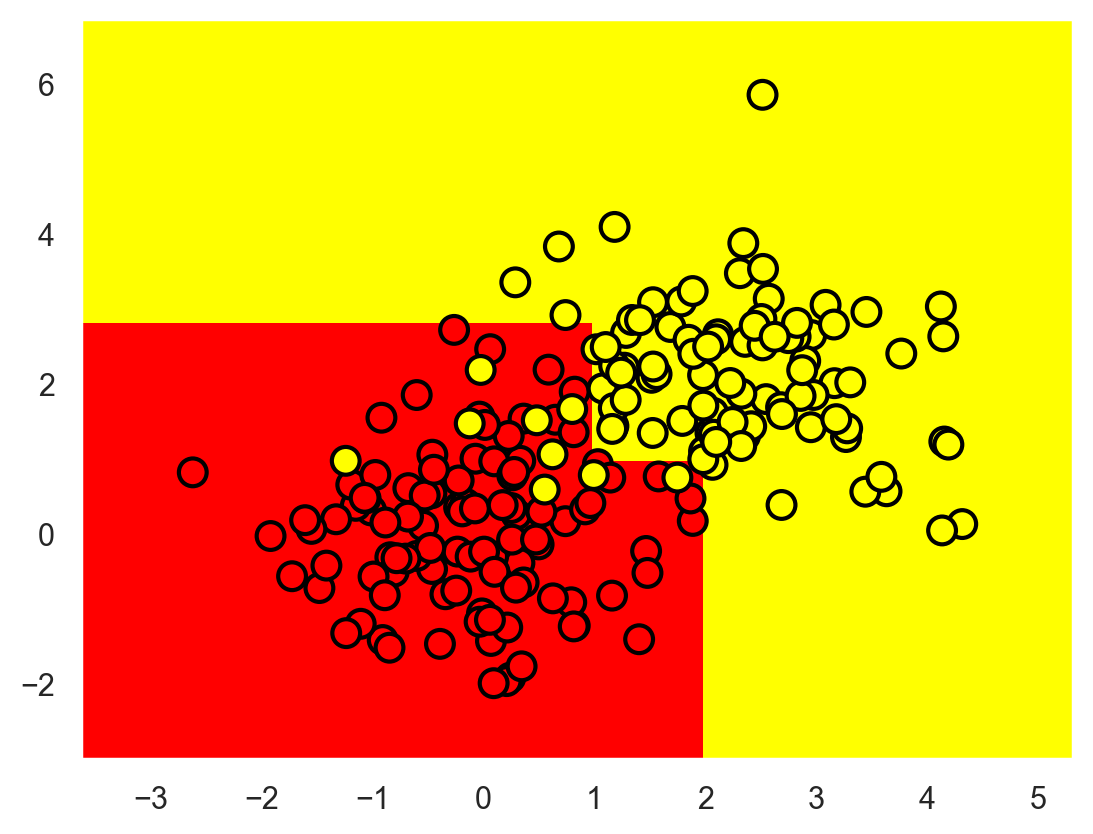

In [188]:
from sklearn.tree import DecisionTreeClassifier

# Writing a helper function to visualize the data

def get_grid(data):
    x_min , x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min , y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min , x_max , 0.01),np.arange(y_min , y_max , 0.01))

clf_tree = DecisionTreeClassifier(criterion = "entropy" , max_depth = 3 , random_state = 17)

clf_tree.fit(train_data,train_labels)

xx , yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);


We shall now visualise the decision tree

In [189]:
import pydotplus
import graphviz
graphviz.set_default_engine('dot')
graphviz.set_default_format('png')
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree , feature_names , png_file_to_save):
    tree_str = export_graphviz(
        tree,feature_names=feature_names, filled = True , out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [190]:
tree_graph_to_png(tree=clf_tree,
                  feature_names=["x1","x2"],
                  png_file_to_save="topic3_decision_tree1.png")


Looking at the tree png generated we can see how the decision tree splits the samples according to the x and y co-ordinates of the samples. Now we shall look at how the decision tree works with numerical feautures

In [191]:
data = pd.DataFrame(
    {
        "Age" : [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default" : [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [192]:
data.sort_values(by="Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [193]:
age_tree = DecisionTreeClassifier(criterion = "entropy" , random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)
tree_graph_to_png(
    tree = age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree3.png"

)

In [194]:
data2 = pd.DataFrame({
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [195]:
data2.sort_values(by="Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [196]:
age_sal_tree = DecisionTreeClassifier(criterion = "entropy" , random_state = 17)
age_sal_tree.fit(
    data2[["Age", "Salary"]].values, data2["Loan Default"].values
)
tree_graph_to_png(
    tree = age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree4.png"
)

We can see in this tree the Algorithm decides to cut at the variables where the Maximum Information Gain is reached 

# Crucial Tree Parameters
We should never construct tree's to the maximum depth otherwise they shall start overfitting to the training data and will not be able to generalise well with new predictions. There are 2 exception to when we should construct tree's to maximum depth

Random Forest (a group of trees) averages the responses from individual trees that are built to the maximum depth (we will talk later on why you should do this)

Pruning trees. In this approach, the tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using cross-validation, more on this below).

The most common ways to deal with overfitting in decision trees are as follows:

artificial limitation of the depth or a minimum number of samples in the leaves: the construction of a tree just stops at some point;

pruning the tree.


#Using Decision Tree's to predict Numerical Values
When using Decision Tree's to predict a Numerical Target i.e a regression problem , we change the metric to the Variance 
$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2,$$

where $l$ is the number of samples in a leaf , $y_i$ is the value of the target variable. Simply put, by minimizing the variance, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

We shall see an example below. 

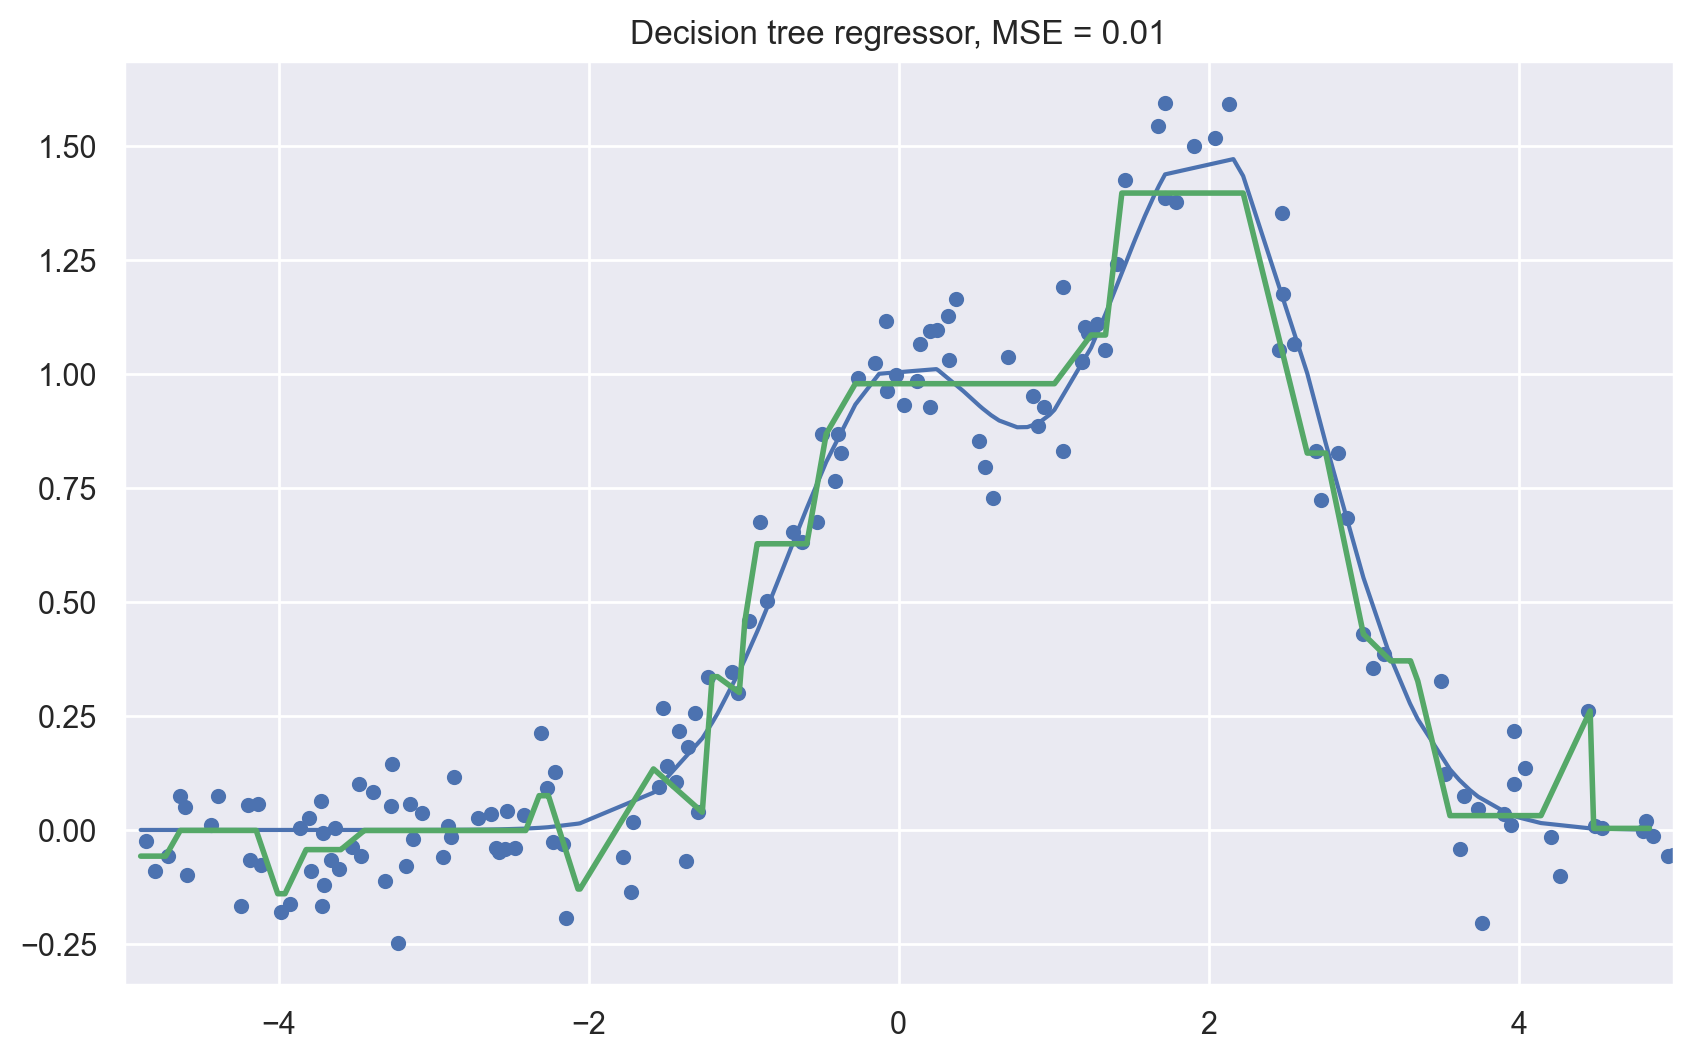

In [197]:
n_train =150
n_test = 100
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-(x**2))+1.5*np.exp(-((x - 2) ** 2))

def generate(n_samples , noise):
    X = np.random.rand(n_samples)*10 -5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y

X_train , y_train = generate(n_train , noise = noise)
X_test , y_test = generate(n_test , noise = noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train , y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

tree_graph_to_png(tree=reg_tree,
                  feature_names=["x"],
                  png_file_to_save="topic3_decision_tree5.png")

We can see that the algorithm approximates the curve with a linear piecewise function . As we increase the number of tree's we can see the fitted curve overfit to the data . More importantly it over adjusts the fitted curve to include outliers in the data . This affects how the model will generalise to unseen data. This is we why prune the tree or use limit the number depth of the tree.

#Nearest Neighbhours Method
The nearest neighbors method (k-Nearest Neighbors, or k-NN) is another very popular classification method that is also sometimes used in regression problems. This, like decision trees, is one of the most comprehensible approaches to classification. The underlying intuition is that you look like your neighbors. More formally, the method follows the compactness hypothesis: if the distance between the examples is measured well enough, then similar examples are much more likely to belong to the same class.

To classify each sample from the test set, one needs to perform the following operations in order:

Calculate the distance to each of the samples in the training set.

Select $k$ samples from the training set with the minimal distance to them.

The class of the test sample will be the most frequent class among those $k$ nearest neighbors.

When using the method for regression problem (numerical prediction) , we return the mean of the $k$ nearest neighbhours.


One of the main advantages of the K-NN method is that its lazy , meaning that calculations are only made during the prediction phase. No model is constructed from training examples as supposed to Decision Tree's

# Choosing Model Parameters and Cross-Validation

The main task of learning algorithms is to be able to generalize to unseen data. Since we cannot immediately check the model performance on new, incoming data (because we do not know the true values of the target variable yet), it is necessary to sacrifice a small portion of the data to check the quality of the model on it.

This is often done in one of two ways:

Setting aside a part of the dataset (held-out/hold-out set). Thus we reserve a fraction of the training set (typically from 20% to 40%), train the model on the remaining data (60-80% of the original set), and compute performance metrics for the model (e.g accuracy) on the hold-out set.

Cross-validation. The most frequent case here is k-fold cross-validation.

In k-fold cross-validation, the model is trained $K$ times on different ($K-1$) subsets of the original dataset (in white) and checked on the remaining subset. We obtain $K$ model quality assessments that are usually averaged to give an overall average quality of classification/regression.

Cross-validation provides a better assessment of the model quality on new data compared to the hold-out set approach. However, cross-validation is computationally expensive when you have a lot of data.

# Application Examples and Complex Cases

In [198]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [199]:
df = pd.read_csv(DATA_PATH +"telecom_churn.csv")
df["International plan"]=pd.factorize(df["International plan"])[0]
df["Voice mail plan"]=pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"].astype("int")
df.drop(["State","Churn"], axis = 1 , inplace = True)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


We have replaced Categorical Features like Internation Plan and Voice Mail Plan with Binary Features such as 0 and 1 for it to be fed into the ml algorithms. We have removed the state column for now , but we shall asses its effect on the model later. We shall allocate 70% of the data for training and 30% for testing. We shall use the test set to measure the accuracy of our model. We shall train 2 model Decision Classfier and K-NN Neighbhours to see how they do against each other. We shall assume a tree depth of 5 and $K$ of 10.

In [200]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_Train, X_Test, y_Train, y_Test = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_Train, y_Train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_Train)
X_Test_scaled = scaler.transform(X_Test)
knn.fit(X_Train_scaled, y_Train);

The StandardScaler() transforms all the values of each feature to have to follow a Normal Distribution with a mean of 0 and a standarad deviation of 1. This ensures all the features contribute equally to the calculation as the K-NN algorithm is distance based. We shall now asses prediction quality using the accuracy metric

In [201]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_Test)
accuracy_score(y_Test , tree_pred)

0.94

In [202]:
knn_pred = knn.predict(X_Test_scaled)
accuracy_score(y_Test, knn_pred) 

0.89

Let’s assess prediction quality on our hold-out set with a simple metric, the proportion of correct answers (accuracy). The decision tree did better: the percentage of correct answers is about 94% (decision tree) versus 88% (k-NN). Note that this performance is achieved by using random parameters.

Now, let’s identify the parameters for the tree using cross-validation. We’ll tune the maximum depth and the maximum number of features used at each split. Here is the essence of how the GridSearchCV works: for each unique pair of values of max_depth and max_features, compute model performance with 5-fold cross-validation, and then select the best combination of parameters.

In [203]:
from sklearn.model_selection import GridSearchCV , cross_val_predict

tree_params = {"max_depth" : range(1,11) , "max_features" : range(4,19) }

tree_grid = GridSearchCV(tree , tree_params , cv=5 , n_jobs=-1 ,verbose=True )

tree_grid.fit(X_Train , y_Train)



Fitting 5 folds for each of 150 candidates, totalling 750 fits


,estimator,DecisionTreeC...ndom_state=17)
,param_grid,"{'max_depth': range(1, 11), 'max_features': range(4, 19)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [204]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [205]:
tree_grid.best_score_

np.float64(0.94257014456259)

In [206]:
accuracy_score(y_Test , tree_grid.predict(X_Test))

0.946

In [207]:
tree_graph_to_png(
    tree = tree_grid.best_estimator_,
    feature_names=df.columns,
    png_file_to_save = "topic3_decision_tree6.png"

)

Now lets tune the number of neighbours $k$ for the K-NN

In [208]:
from sklearn.pipeline import Pipeline

knn_pipe = Pipeline(
    [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors" : range(1,10)}

knn_grid = GridSearchCV(knn_pipe , knn_params , cv = 5 , n_jobs = -1 , verbose= True)

knn_grid.fit(X_Train , y_Train)

knn_grid.best_score_,knn_grid.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


(np.float64(0.8859867109023905), {'knn__n_neighbors': 7})

In [209]:
accuracy_score(y_Test , knn_grid.predict(X_Test))

0.89

Here, the tree proved to be better than the nearest neighbors algorithm: 94.2%/94.6% accuracy for cross-validation and hold-out respectively. Decision trees perform very well, and even random forest (let’s think of it for now as a bunch of trees that work better together) in this example cannot achieve much better performance (95.1%/95.3%) despite being trained for much longer.

Decision Trees and k-NN in a Task of MNIST Handwritten Digits Recognition

Now let’s have a look at how these 2 algorithms perform on a real-world task. We will use the sklearn built-in dataset on handwritten digits. This task is an example where k-NN works surprisingly well.

Pictures here are 8x8 matrices (intensity of white color for each pixel). Then each such matrix is ​​“unfolded” into a vector of length 64, and we obtain a feature description of an object.

Let’s draw some handwritten digits. We see that they are distinguishable.

In [210]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV , cross_val_score


data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

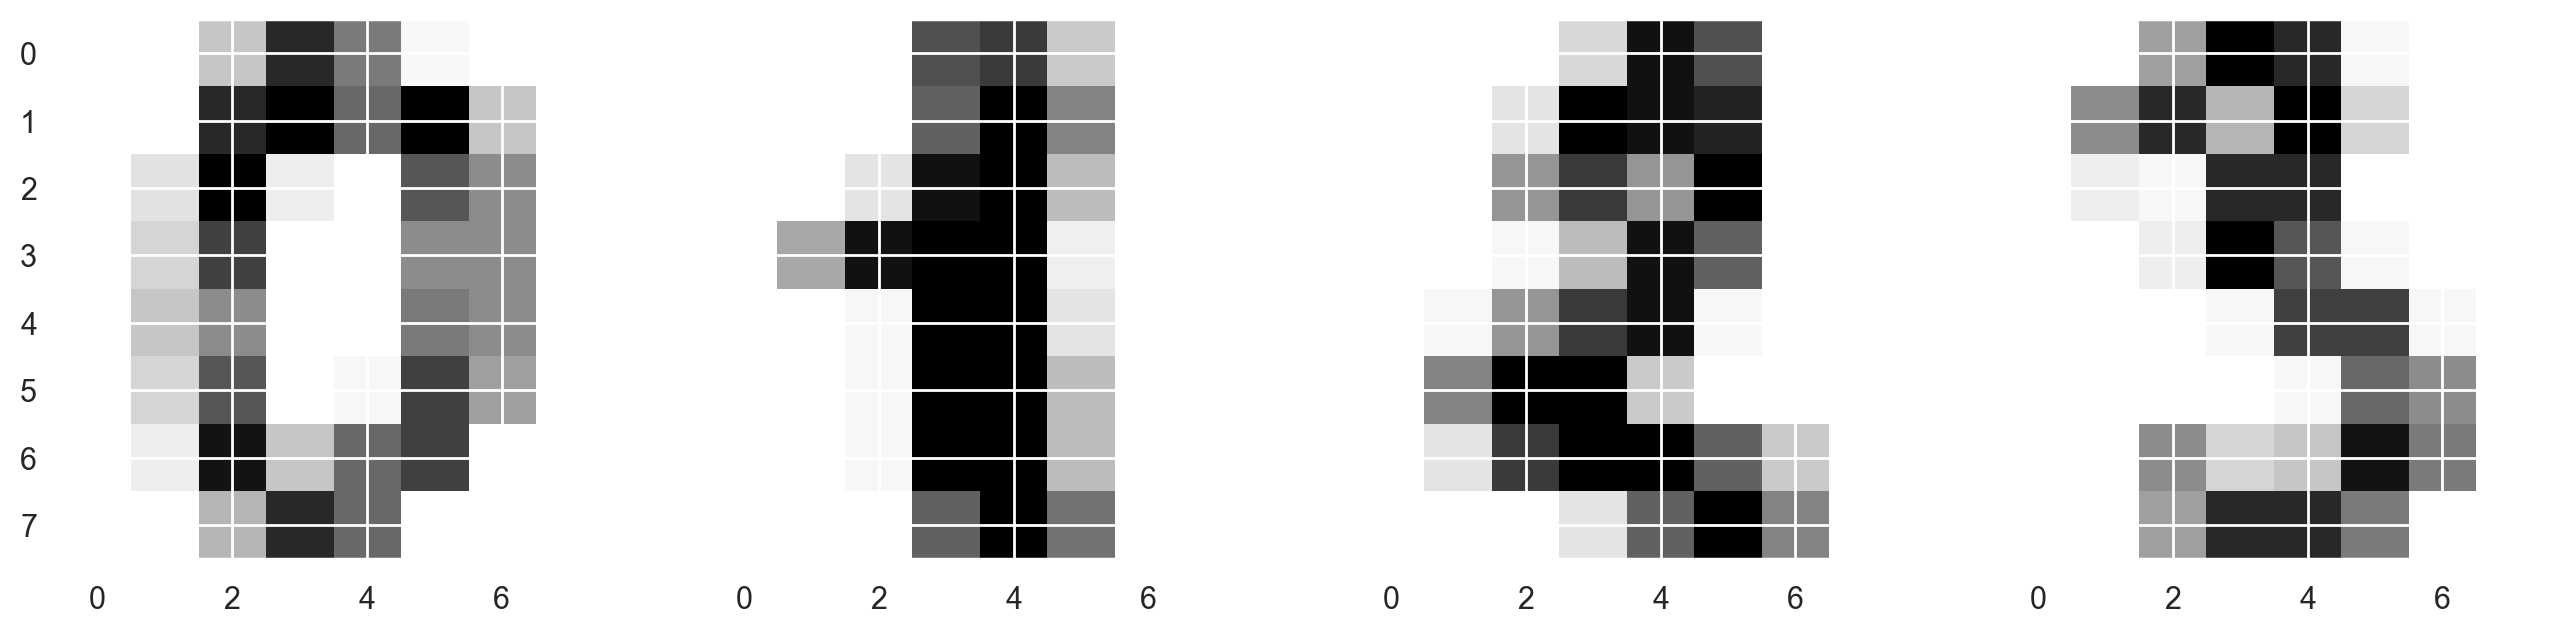

In [211]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

Next, let’s do the same experiment as in the previous task, but, this time, let’s change the ranges for tunable parameters.

Let’s select 70% of the dataset for training (X_train, y_train) and 30% for holdout (X_holdout, y_holdout). The holdout set will not participate in model parameters tuning; we will use it at the end to check the quality of the resulting model

In [212]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)


In [213]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [214]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(
    y_holdout, tree_pred
)

(0.975925925925926, 0.6666666666666666)

Now let’s tune our model parameters using cross-validation as before, but now we’ll take into account that we have more features than in the previous task: 64.

In [215]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


,estimator,DecisionTreeC...ndom_state=17)
,param_grid,"{'max_depth': [1, 2, ...], 'max_features': [1, 2, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [216]:
tree_grid.best_params_ , tree_grid.best_score_

({'max_depth': 10, 'max_features': 50}, np.float64(0.8568203376968316))

That has already passed 66% but not quite 97%. kNN works better on this dataset. In the case of one nearest neighbour, we were able to reach 99% guesses on cross-validation.

In [217]:
np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)
)  

np.float64(0.9864858028204642)

The conclusion of this experiment (and general advice): first check simple models on your data: decision tree and nearest neighbors (next time we will also add logistic regression to this list). It might be the case that these methods already work well enough.